In [1]:
import pandas as pd

###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [61]:
index = pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])
df = pd.DataFrame([
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,4],

],index=index,columns=pd.MultiIndex.from_product([['Delhi','Mumbai'],['Average_score','Students']])
)
df

Delhi                 Mumbai         
         Average_score Students Average_score Students
cse 2019             1        2             3        4
    2020             1        2             3        4
    2021             1        2             3        4
    2022             1        2             3        4
ece 2019             1        2             3        4
    2020             1        2             3        4
    2021             1        2             3        4
    2022             1        2             3        4

In [60]:
df.unstack(level=0).stack(level=0).swaplevel(axis=1).swaplevel().sort_index()

cse           ece      cse      ece
            Average_score Average_score Students Students
Delhi  2019             1             1        2        2
       2020             1             1        2        2
       2021             1             1        2        2
       2022             1             1        2        2
Mumbai 2019             3             3        4        4
       2020             3             3        4        4
       2021             3             3        4        4
       2022             3             3        4        4

###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [222]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [223]:
# country - level0 - index
# Provinance/State - level1 - index

# date -> column 
# No of cases - > columns
# No of Deaths - > columns

In [224]:
confirm = confirm.melt(id_vars=["Province/State","Country/Region",'Lat','Long'],var_name='date',value_name='Number_of_cases')

In [225]:
deaths=deaths.melt(id_vars=["Province/State","Country/Region",'Lat','Long'],var_name='date',value_name='Number_of_deaths')
final = confirm.merge(deaths,on=["Province/State","Country/Region",'Lat','Long','date'])[["Province/State","Country/Region",'date','Number_of_cases','Number_of_deaths']]

In [226]:
final.set_index(["Country/Region",'Province/State'],inplace=True)
final_df = final[['date','Number_of_cases','Number_of_deaths']]

###`Q-3:` Show Country with Highest death percent out of confirmed Cases. 

In [227]:
final=final.groupby('Country/Region').sum()
final['death_percent']=(final['Number_of_deaths']/final['Number_of_cases']) * 100
final

,Number_of_cases,Number_of_deaths,death_percent
Country/Region,,,
Afghanistan,116218938,4901323,4.217319
Albania,163505982,2248012,1.374881
Algeria,164830894,4447129,2.697995
Andorra,21390392,116300,0.543702
Angola,53083822,1104387,2.080459
...,...,...,...
West Bank and Gaza,366130648,3377981,0.922616
Winter Olympics 2022,179152,0,0.000000
Yemen,7091065,1372952,19.361718


### `Q-4` : Make a dataframe for India from 

Covid Data with one extra column representing no of new cases. 

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 = 

Note:- Try using shift Function


In [245]:
final
s = pd.Series([1,2,3,4,5,6])
s.shift(1)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

In [234]:
final = final_df.loc['India'].copy()

In [247]:
final['No_of_new_cases']=final['Number_of_cases']-final['Number_of_cases'].shift(1)

In [248]:
final

,date,Number_of_cases,Number_of_deaths,No_of_new_cases
Province/State,,,,
NaN,1/22/20,0,0,NaN
NaN,1/23/20,0,0,0.0
NaN,1/24/20,0,0,0.0
NaN,1/25/20,0,0,0.0
NaN,1/26/20,0,0,0.0
...,...,...,...,...
NaN,12/29/22,44679382,530699,243.0
NaN,12/30/22,44679608,530702,226.0
NaN,12/31/22,44679873,530705,265.0


### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town". 

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [2]:
df = pd.read_csv('List of most-polluted cities by particulate matter concentration - List of most-polluted cities by particulate matter concentration (1).csv')

In [40]:
#df.drop(columns=['Unnamed: 0'],inplace=True)
final = df.set_index(['Country','City/Town'])[['PM10','PM2.5']]
india = final.loc['India']
#Q1
india['PM10'].sort_values(ascending=False).head(1).index[0]

'Kanpur'

In [46]:
#Q2
india['PM10'].sort_values().head(1).index[0]

'Aizawl'

In [54]:
#Q3
final.loc['China']['PM10'].sort_values(ascending=False).head(1).index[0]

'Jinan'

In [55]:
#Q4
final.loc['China']['PM10'].sort_values().head(1).index[0]

'Anshun'

In [111]:
ind = final.loc['Poland']['PM10'].index[0:]
val = final.loc['Poland']['PM10'].values

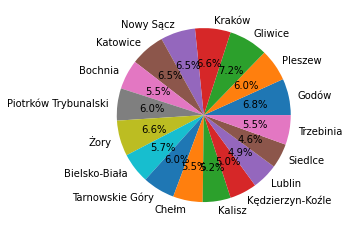

In [115]:
import matplotlib.pyplot as plt
plt.pie(val,labels=ind,autopct='%0.1f%%');

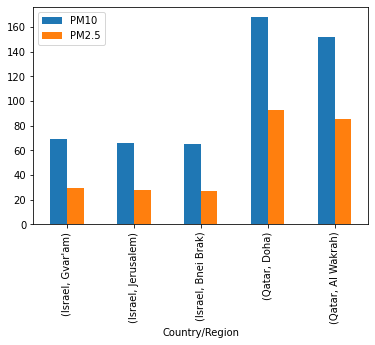

In [104]:
#Q6
is_qa = final.loc[['Israel','Qatar']][['PM10','PM2.5']]

is_qa.plot(kind='bar');
plt.xlabel("Country/Region");

In [119]:
#Q7
type(final.stack())

pandas.core.series.Series